https://www.slideshare.net/ssuserdff4c9/ss-249299130?from_action=save


https://sshmyb.tistory.com/171

https://kr.linkedin.com/in/suyeon-ha-3253b56a

##Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = '/content/drive/MyDrive/2022-산업공학종합설계/LSWMD.pkl'

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.layers import MaxPooling2D
from keras.layers import MaxPool2D

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import tensorflow as tf
import keras
from keras import layers, Input, models
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_pickle(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]


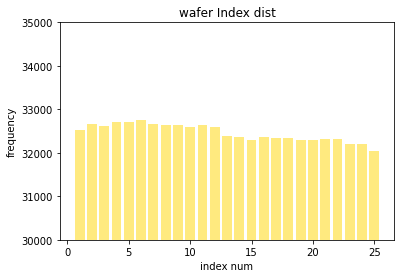

In [ ]:
lot_index = np.unique(df.waferIndex, return_counts=True)
plt.bar(lot_index[0], lot_index[1], color='gold', align = 'center', alpha = 0.5)
plt.title("wafer Index dist")
plt.xlabel("index num")
plt.ylabel("frequency")
plt.ylim(30000, 35000)
plt.show()

In [ ]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
mapping_traintest={'Training':0,'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

/usr/local/lib/python3.7/dist-packages/pandas/core/array_algos/replace.py:84: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [ ]:
df.head(5)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,failureNum,trainTestNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]],8,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]],8,0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]],8,0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]],8,0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]],8,0


In [ ]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_withlabel =df_withlabel.reset_index()
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_withpattern = df_withpattern.reset_index()
df_nonpattern = df[(df['failureNum']==8)]
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]

(172950, 25519, 147431)

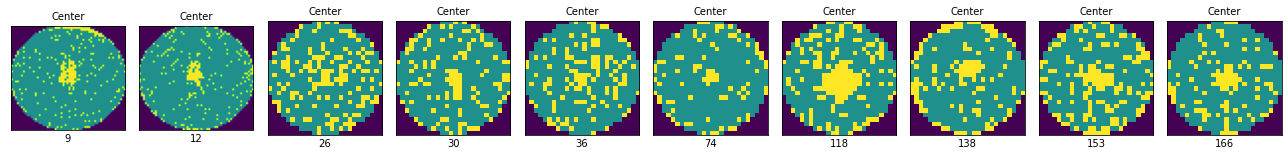

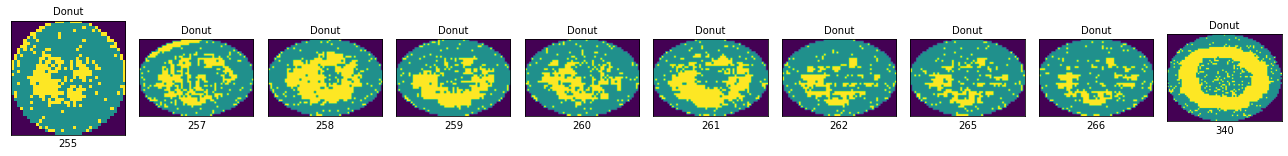

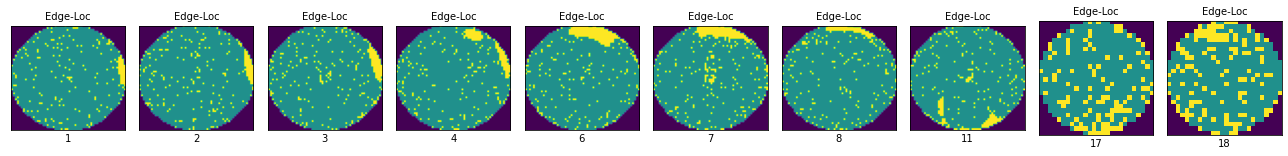

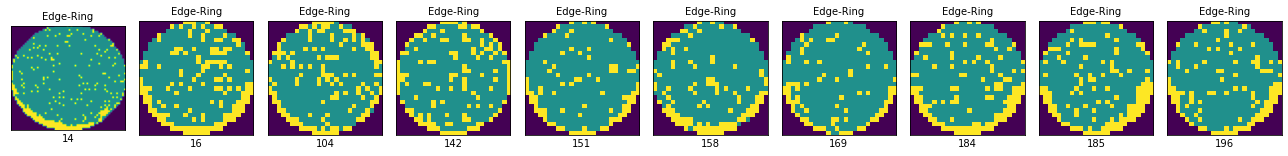

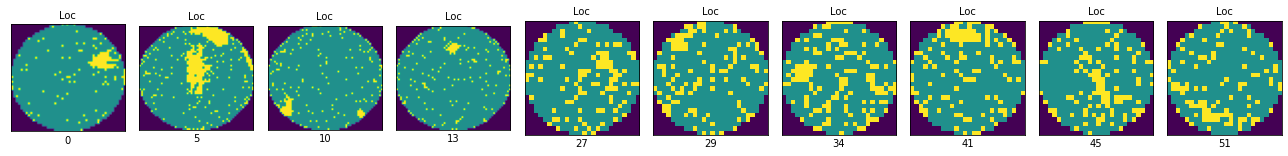

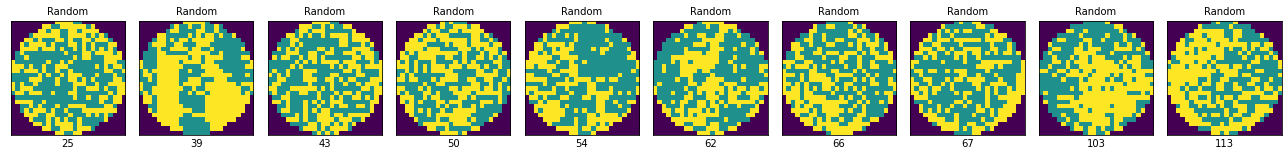

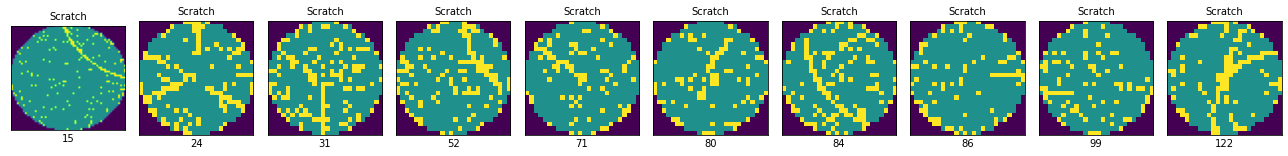

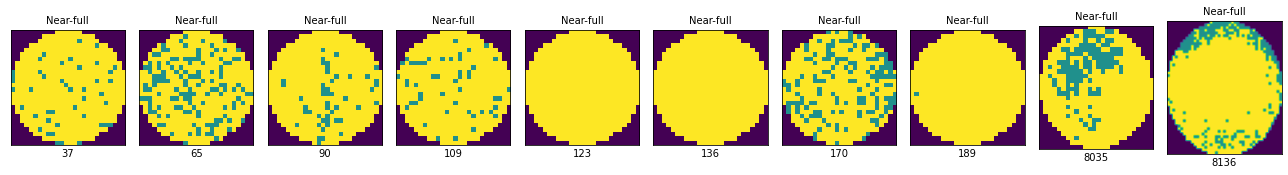

In [ ]:
x = [0,1,2,3,4,5,6,7]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

for k in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.ravel(order='C')
    for j in [k]:
        img = df_withpattern.waferMap[df_withpattern.failureType==labels2[j]]
        for i in range(10):
            ax[i].imshow(img[img.index[i]])
            ax[i].set_title(df_withpattern.failureType[img.index[i]][0][0], fontsize=10)
            ax[i].set_xlabel(df_withpattern.index[img.index[i]], fontsize=10)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show()

In [ ]:
#웨이퍼 인덱스별 데이터는 분류기능에는 필요하지 않다고 판단되어 제거
df = df.drop(['waferIndex'],axis = 1)

In [ ]:
df = df.drop(['trianTestLabel'],axis = 1)

In [ ]:
#필요한 웨이퍼의 해상도별로 뽑아내기 위해 생성
def make_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(make_dim)
df.sample(10)

,waferMap,dieSize,lotName,failureType,failureNum,trainTestNum,waferMapDim
777091,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",935.0,lot46147,[[none]],8,1,"(35, 34)"
609990,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",710.0,lot38355,[],[],[],"(32, 29)"
665557,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",712.0,lot41447,[],[],[],"(32, 29)"
371122,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3030.0,lot22175,[],[],[],"(54, 71)"
589754,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,...",515.0,lot36806,[],[],[],"(25, 27)"
348357,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1163.0,lot20808,[],[],[],"(39, 39)"
176076,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1624.0,lot11252,[],[],[],"(46, 45)"
554455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2,...",515.0,lot34804,[],[],[],"(25, 27)"
52190,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1557.0,lot4249,[],[],[],"(47, 42)"
159657,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",515.0,lot10290,[],[],[],"(25, 27)"


In [ ]:
# 웨이퍼의 사이즈
def make_size(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    pi = 3.14
    return dim0*dim1*pi
df['waferSize']=df.waferMap.apply(make_size)
df['netdieSize'] = df['dieSize'] / df['waferSize']
df.sample(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferSize,netdieSize
40591,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5342.0,lot3570,22.0,[],[],21238.96,0.251519
774791,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1442.0,lot46051,18.0,[[Test]],[[none]],5793.30,0.248908
428068,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2367.0,lot25841,20.0,[],[],9448.26,0.250522
457403,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2,...",686.0,lot28180,1.0,[],[],2725.52,0.251695
457496,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",686.0,lot28185,12.0,[],[],2725.52,0.251695
475334,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot29320,4.0,[],[],6000.54,0.252144
104202,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",986.0,lot7127,23.0,[],[],4069.44,0.242294
243139,"[[0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 0,...",260.0,lot15116,5.0,[],[],1073.88,0.242113
546482,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot34181,21.0,[],[],6000.54,0.252144
44809,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",939.0,lot3857,14.0,[],[],3796.26,0.247349


In [ ]:
df['waferMapDim'].value_counts()

(32, 29)    108687
(25, 27)     64083
(49, 39)     39323
(26, 26)     30078
(30, 34)     29513
             ...  
(53, 70)         1
(99, 69)         1
(38, 50)         1
(45, 47)         1
(27, 71)         1
Name: waferMapDim, Length: 632, dtype: int64

In [ ]:
# wafermapdim이 해상도를 의미 / (26,26)인 wafer를 보자.
ex_df = df.loc[df['waferMapDim'] == (26, 26)]
ex_wafer = ex_df['waferMap'].values

a = np.ones((1, 26, 26))
Type = list()

for i in range(len(ex_df)):
    # skip none
    if len(ex_df.iloc[i,:]['failureType']) == 0:
        continue
    a = np.concatenate((a, ex_df.iloc[i,:]['waferMap'].reshape(1, 26, 26)))
    Type.append(ex_df.iloc[i,:]['failureType'][0][0])

In [ ]:
x = a[1:]
y = np.array(Type).reshape((-1,1))

In [ ]:
y

In [ ]:
print('x shape : {}, y shape : {}'.format(x.shape, y.shape))

In [ ]:
plt.imshow(x[99])
plt.show()
print('Faulty case : {} '.format(y[99]))

In [ ]:
x = x.reshape((-1, 26, 26, 1))

In [ ]:
x.shape

In [ ]:
#불량 클래스
faulty_case = np.unique(y)
for f in faulty_case :
    print('{} : {}'.format(f, len(y[y==f])))

웨이퍼 데이터의 각 픽셀에는 웨이퍼가 아닌 0, 1: 정상, 2: 결함을 나타내는 범주형 변수가 있다. 원-핫 인코딩된 단일 범주 데이터를 채널로 사용하여 추가 차원을 확장한다.



In [ ]:
len(x)

In [ ]:
#각 채널에 따라 원핫인코딩
new_x = np.zeros((len(x), 26, 26, 3))

for w in range(len(x)):
    for i in range(26):
        for j in range(26):
            new_x[w, i, j,int(x[w, i, j])] = 1

In [ ]:
new_x.shape